# Estimation of the MC Needs for the BDT Training
- calculate learning curves for many different masses and regions


# Standard imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import HpAlgorithms
import HpMLUtils
import HpMLPlots
import HpHyperParameterOptimisation
import HpTrainingFrame

show groups in hdf5 file

In [3]:
import h5py
h5f = h5py.File("/eos/user/j/jglatzer/L2Output_R20_Nov_v2/pandas_allregions.h5", "r")
h5f.keys()

[u'allregions']

In [25]:
df_mc=pd.read_hdf('/eos/user/j/jglatzer/L2Output_R20_Nov_v2/pandas_allregions.h5', 'allregions')

# Prepare data for H+ classification

split into test and training data

In [30]:
regions=['INC_5j3b', 'INC_5jge4b','INC_ge6j3b','INC_ge6jge4b']
hpmasses_all=[200,225,250,275,300,350,400,500,600,700,800,900,1000,1200,1400,1600,1800,2000]
hpmasses=hpmasses_all[0::4]
#for region in regions:
#    df_mc[region]=df_mc_all[df_mc_all.region==region]
#    print region, df_mc[region].shape

In [31]:
print hpmasses
#clf=HpAlgorithms.getGradientBDTClassifier()#options={"n_estimators":10})

[200, 300, 600, 1000, 1800]


In [32]:
train_sizes=np.linspace(0.2,1,5)
all_train_scores={}
all_test_scores={}
htf=HpTrainingFrame.HpTrainingFrame(df_mc)
for region in regions:
    print "Looking at region", region
    all_train_scores[region]={}
    all_test_scores[region]={}
    for hpmass in hpmasses:
        print "   Looking at hpmass=",hpmass
        X_train, X_test, X_eval, y_train, y_test,y_eval, w_train, w_test, w_eval=htf.prepare(hpmass=hpmass,region=region)
        #print hpmass, X_train.shape, X_test.shape, X_eval.shape, y_train.shape, y_test.shape, y_eval.shape, w_train.shape, w_test.shape, w_eval.shape
        clf=HpAlgorithms.getGradientBDTClassifier()
        opt=HpHyperParameterOptimisation.HpOptimise("StandardBDT"+region+"Hp"+str(hpmass),clf,X_train,y_train,w_train,X_test,y_test,w_test)
        _, train_scores, test_scores = opt.calculateLearningCurve(train_sizes=train_sizes, category=1) #sample only signal events
        all_train_scores[region][hpmass]=train_scores
        all_test_scores[region][hpmass]=test_scores

Looking at region INC_5j3b
   Looking at hpmass= 200
   Looking at hpmass= 300
   Looking at hpmass= 600
   Looking at hpmass= 1000
   Looking at hpmass= 1800
Looking at region INC_5jge4b
   Looking at hpmass= 200
   Looking at hpmass= 300
   Looking at hpmass= 600
   Looking at hpmass= 1000
   Looking at hpmass= 1800
Looking at region INC_ge6j3b
   Looking at hpmass= 200
   Looking at hpmass= 300
   Looking at hpmass= 600
   Looking at hpmass= 1000
   Looking at hpmass= 1800
Looking at region INC_ge6jge4b
   Looking at hpmass= 200
   Looking at hpmass= 300
   Looking at hpmass= 600
   Looking at hpmass= 1000
   Looking at hpmass= 1800


In [33]:
print all_train_scores
print all_test_scores

{'INC_5j3b': {200: [0.25753328960971944, 0.28229099737812235, 0.2911356831060812, 0.2969331251372521, 0.3010333052457106], 600: [0.07724107475286435, 0.08879457042749173, 0.09310421988135953, 0.09402949666681837, 0.09477901677862066], 300: [0.22024052440275455, 0.2484859184403838, 0.26408538840680074, 0.27320793455053816, 0.277194335160563], 1000: [0.02808568763575192, 0.029958459275567062, 0.02896536929341642, 0.029999154849403187, 0.029900308017255295], 1800: [0.008169459488206687, 0.008297598517862603, 0.0073011112581865545, 0.007195548698202492, 0.00731459351096253]}, 'INC_ge6j3b': {200: [0.25541183208073714, 0.28399313794490166, 0.2894547833425558, 0.2976419380063732, 0.302365970137799], 600: [0.13271060134693513, 0.14705583679395484, 0.15156252845507223, 0.15343300701083518, 0.1554620562992317], 300: [0.2532532800815078, 0.2779923168154529, 0.2912918689168682, 0.301466275412689, 0.3062023982852238], 1000: [0.05817314638193449, 0.06214784906994919, 0.06355054391473969, 0.063278958

## draw the learning curve

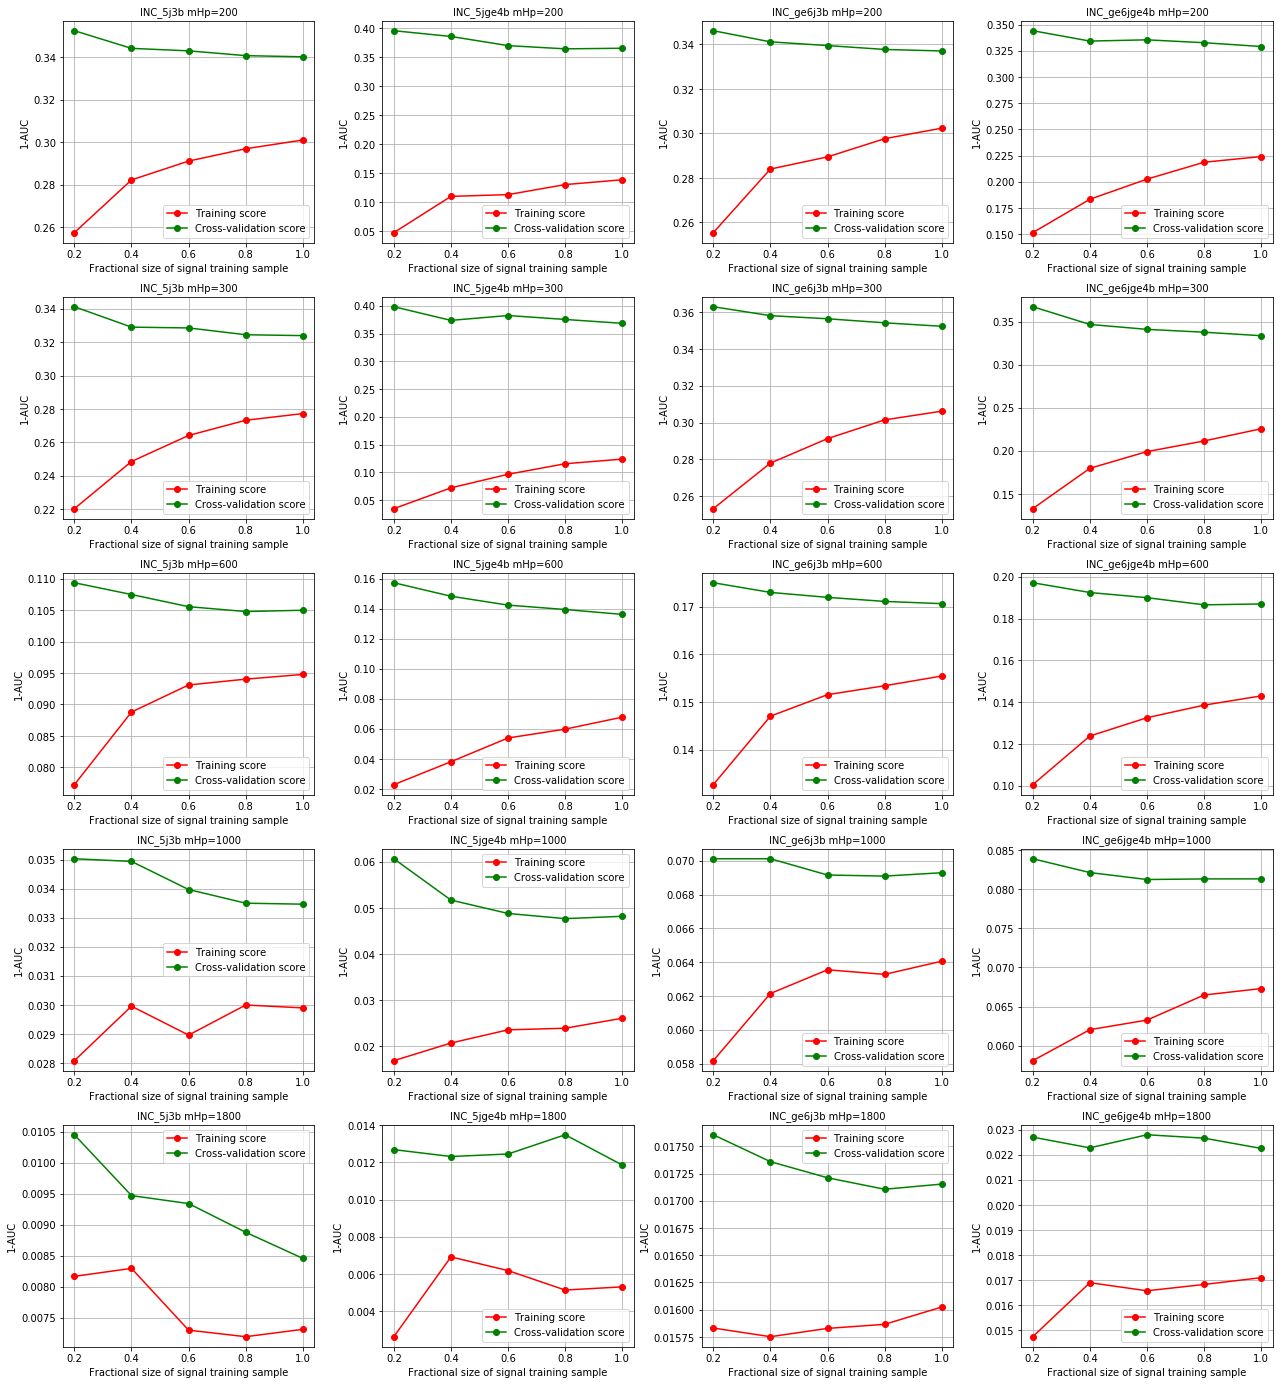

In [49]:
#fig, axes=plt.figure(figsize=(20,20))
fig, axes = plt.subplots(nrows=len(hpmasses), ncols=len(regions), figsize=(20, 20))
n=0
for mass in hpmasses:
    for region in regions:
        n=n+1
        plt.subplot(len(hpmasses), len(regions),n)
        plt.plot(train_sizes, all_train_scores[region][mass], 'o-', color="r",
                 label="Training score")
        plt.plot(train_sizes, all_test_scores[region][mass], 'o-', color="g",
                 label="Cross-validation score")
        plt.xlabel('Fractional size of signal training sample')
        plt.ylabel("1-AUC")
        plt.legend(loc=0)
        plt.grid()
        plt.title(region+" mHp="+str(mass), fontsize=10)
        
pad = 10 # in points

for ax, col in zip(axes[0], regions):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], hpmasses):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

fig.tight_layout()
# tight_layout doesn't take these labels into account. We'll need 
# to make some room. These numbers are are manually tweaked. 
# You could automatically calculate them, but it's a pain.
fig.subplots_adjust(left=0.15, top=0.95)
plt.show()
#region="INC_5j3b"
#mass=200
